##Mini Project - 
###Name: Maitri Shah
###Program: B.Tech CSE AI
###Semester: 4
###Date of Experiment: 22.03.22

#Aim: Text Recognition after Thresholding Segmentation

In this mini project, we perform 4 different types of thresholding on our input image and make a subjective comparison on them to conclude our results.  
The four types of thresholding are: 


1.   Simple Thresholding
2.   Global Thresholding
3.   Adaptive Thresholding (Mean and Gaussian)
4.   OTSU Thresholding

We perform thresholding using inbuilt and self-made custom algorithms. 



 




###Image Source: https://www.kaggle.com/c/denoising-dirty-documents/data 
###Image Link in Drive: https://drive.google.com/file/d/1z6CvFq7QYmZhWuwwaNBwR72pHkWvGzc6/view?usp=sharing

###Collab Notebook Link: https://colab.research.google.com/drive/1ymS-Ay32GpBIqfFmmOqz5foCNLYdY8up?usp=sharing

### Import Calls

In [ ]:
#IMPORTS

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import cv2

!pip install pytesseract
import pytesseract

import warnings
warnings.filterwarnings("ignore")

# Import calls for text recognition
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
try:
 from PIL import Image
except ImportError:
 import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,814 kB/s)
debconf: unable to initi

###Program Functions

In [ ]:
#Function to Print Histogram for a particular image

def histogram_printer(img):
  r=img.shape[0]
  c=img.shape[1]
  hist_data = {}
  for i in range(r):
    for j in range(c):
      if (img[i][j] in hist_data):  #intensity present in the image
        hist_data[img[i][j]] += 1 
      else:
        hist_data[img[i][j]] = 1
  # we have to add default zero values at non occuring pixel values in the histogram
  for i in range(255):
    if (i not in hist_data):
      hist_data[i] = 0
      
  plt.stem(list(hist_data.keys()),list(hist_data.values()))

In [ ]:
#Function Defination for Adaptive Mean Thresholding

def adaptiveThresholding(img1, mask):
  img2 = img1.copy()
  skip = mask//2        #Leaving the boundary pixels
  m, n = img1.shape

  for i in range(skip, m - skip, mask):
    for j in range(skip, n - skip, mask):
      temp = img1[i - skip : i + skip + 1, j - skip: j + skip +1] #regional matrix, the one which is under observation
      temp1 = np.mean(temp) - 92  #mean - constant, we use this to subjectively change the output image
      temp2 = np.where(temp > temp1, 255, 0)  #thresholding our image    
      img2[i - skip : i + skip + 1, j - skip: j + skip +1] = temp2 
      
  
  return img2

In [ ]:
#OTSU Algorithm

'''
We divide the image in foreground and background parts at different threshold values and aim at finding the least within class variance at a threshold value t.
The formula for finding the within-class variance at any threshold t is given below: 
Wbg is weight of background and Wfg is weight of foreground.
 
Pall be the count of pixels in an image,
PBG(t) be the count of background pixels at threshold t,
PFG(t) be the count of foreground pixels at threshold t
xi is the value of pixel at i in the group (bg or fg)
x bar is the means of pixel values in the group (bg or fg)
N is the number of pixels.
'''

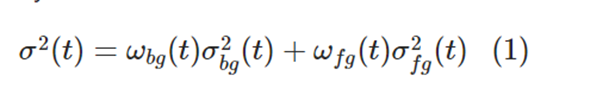
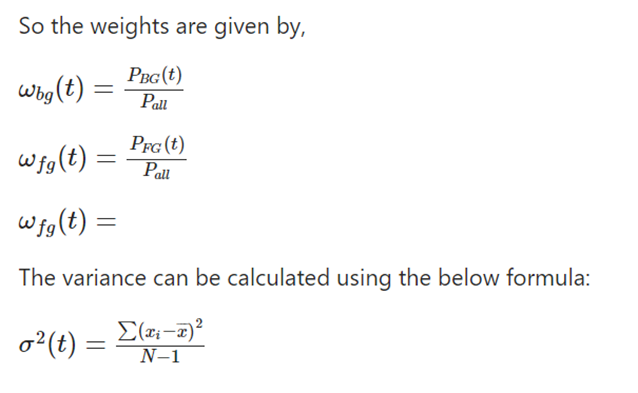

In [ ]:
#OTSU FUNCTION DEFINATION

def otsu(img1):
  nbins = 0.1                        #Added this to tackle the zero and max threshold value
  least_variance = -1
  least_variance_threshold = -1     # We use this as a temporary variable to find the optimal threshold
  flattenimg = img1.flatten() #Convert 2d to 1d array
  weight = len(flattenimg)  #Total no. of pixels

  thres_vals = np.arange(np.min(img1) + nbins , np.max(img1) - nbins, nbins)  #Range of threshold values possible
  #print(thres_vals)

  for value in thres_vals:
    bgimage = flattenimg[flattenimg < value] #background image
    bgweight = len(bgimage) / weight
    bgvariance = np.var(bgimage) #variance in image

    fgimage = flattenimg[flattenimg >= value] #foreground image
    fgweight = len(fgimage) / weight 
    fgvariance = np.var(fgimage) #variance in image

    # now we implement the otsu formula
    varianceofvalue = (bgweight * bgvariance) + (fgweight * fgvariance) 

    # Substituting the least variance and finding the optimal threshold
    if least_variance == -1 or least_variance > varianceofvalue:
      least_variance = varianceofvalue
      least_variance_threshold = value

  return least_variance_threshold

###Read and Pre - Process Image

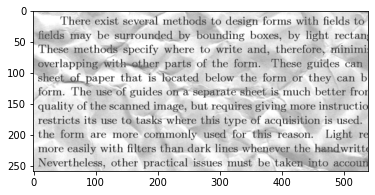

In [ ]:
image = cv2.imread("/content/text_with_background.png", 0)  #Read Image
plt.imshow(image, cmap = 'gray')                                           #Show image

In [ ]:
img = image
print(img)

[[239 233 231 ... 169 176 186]
 [232 233 231 ... 150 160 180]
 [235 238 236 ... 157 151 154]
 ...
 [208 207 210 ... 193 190 196]
 [210 214 221 ... 194 199 212]
 [219 222 224 ... 191 206 222]]


In [ ]:
img.shape       #Dimension of image

(258, 540)

In [ ]:
max = np.max(img)   #Maximum Intensity value in the image
print(max)

255


In [ ]:
#Thresholding
threshold = int(input('Enter Threshold value: '))  #For Input by User

Enter Threshold value: 78


Text(0.5, 1.0, 'Original Image Histogram')

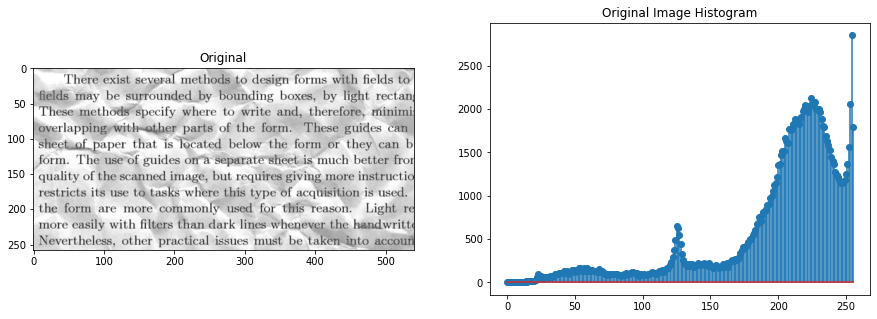

In [ ]:
#Original Image Histogram

fig = plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(1,2,2)
histogram_printer(img)
plt.title('Original Image Histogram')

##Global Thresholding

In [ ]:
'''
The difference between simple and global thresholding is the simple 
thresholding values to 0 and 255, but global thresholding will set them to 
0 and max-1, where max is the maximum intensity in the image.
'''

In [ ]:
m,n = img.shape
max = np.max(img)

globalThresholdImg = np.zeros((m, n))
for i in range(0,m):
  for j in range(0,n):
    if(img[i][j] > threshold):
      globalThresholdImg[i][j] = max - 1 # Sets to max-1 
    else:
      globalThresholdImg[i][j] = 0 

Text(0.5, 1.0, 'Global Threshold Image Histogram')

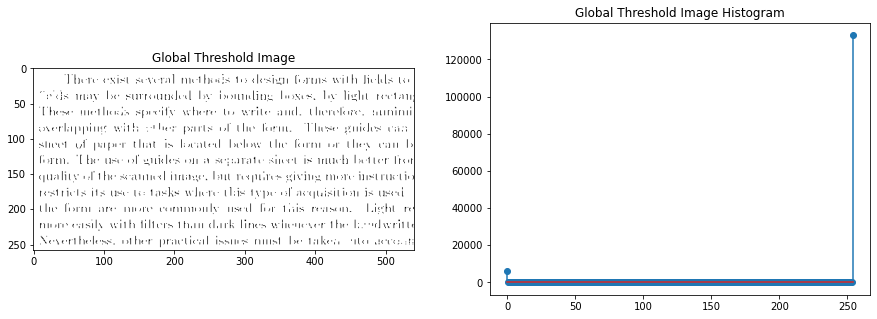

In [ ]:
#Global Thresholded Image along with Histogram

fig = plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.imshow(globalThresholdImg, cmap = 'gray')
plt.title('Global Threshold Image')
plt.subplot(1,2,2)
histogram_printer(globalThresholdImg)
plt.title('Global Threshold Image Histogram')

In [ ]:
#Simple Thresholding
simpleThresholding = np.where(img > threshold, 255, 0) # Sets to 255

Text(0.5, 1.0, 'Simple Thresholding Image Histogram')

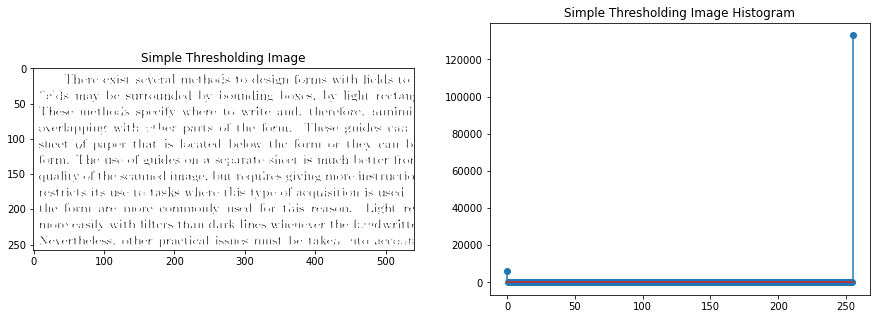

In [ ]:
#Simple Thresholded Image along with Histogram

fig = plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.imshow(simpleThresholding, cmap = 'gray')
plt.title('Simple Thresholding Image')
plt.subplot(1,2,2)
histogram_printer(simpleThresholding)
plt.title('Simple Thresholding Image Histogram')

Text(0.5, 1.0, 'Global Threshold Image')

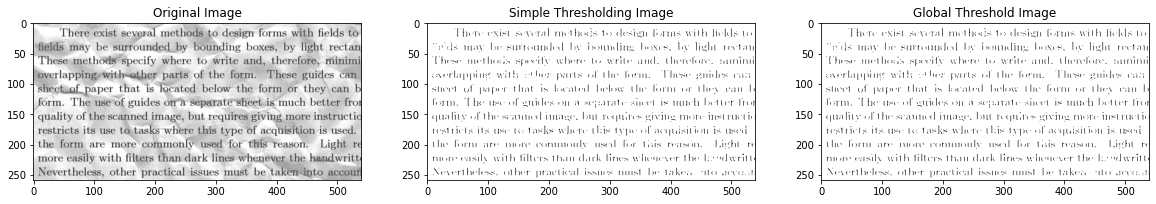

In [ ]:
#subplots for Simple and Global Threshold Image

fig = plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(simpleThresholding, cmap = 'gray')
plt.title('Simple Thresholding Image')
plt.subplot(1,3,3)
plt.imshow(globalThresholdImg, cmap = 'gray')
plt.title('Global Threshold Image')

1. Simple Thresholding: We select a threshold randomly in this type of thresholding. This value then divides our image pixel intensity into 0 and 255, and thus attempts at segmenting the image. The output heavily depends on the threshold value randomly selected, and thus is not dependable for an optimal result. 


2. Global Thresholding: We select a threshold randomly in this type of thresholding. This value then divides our image pixel intensity into 0 and Max-1, and thus attempts at segmenting the image. ‘Max’ is the maximum intensity in the image. The output heavily depends on the threshold value randomly selected, and thus is not dependable for an optimal result.


##Adaptive Thresholding


In [ ]:
# Apply adaptive mean thresholding using custom Algorithm
mask = 35  #size of mask
adapimage = adaptiveThresholding(img, mask)

# To be noted that we subjectively take the block size as 35 and C as 92

# Apply adaptive mean thresholding
adapmean = cv2.adaptiveThreshold(img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 35, C = 92)

#Apply adaptive Gaussian thresholding
adapgauss = cv2.adaptiveThreshold(img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 35, C = 92)

Text(0.5, 1.0, 'Adaptive Mean Thresholded Image - OpenCV ')

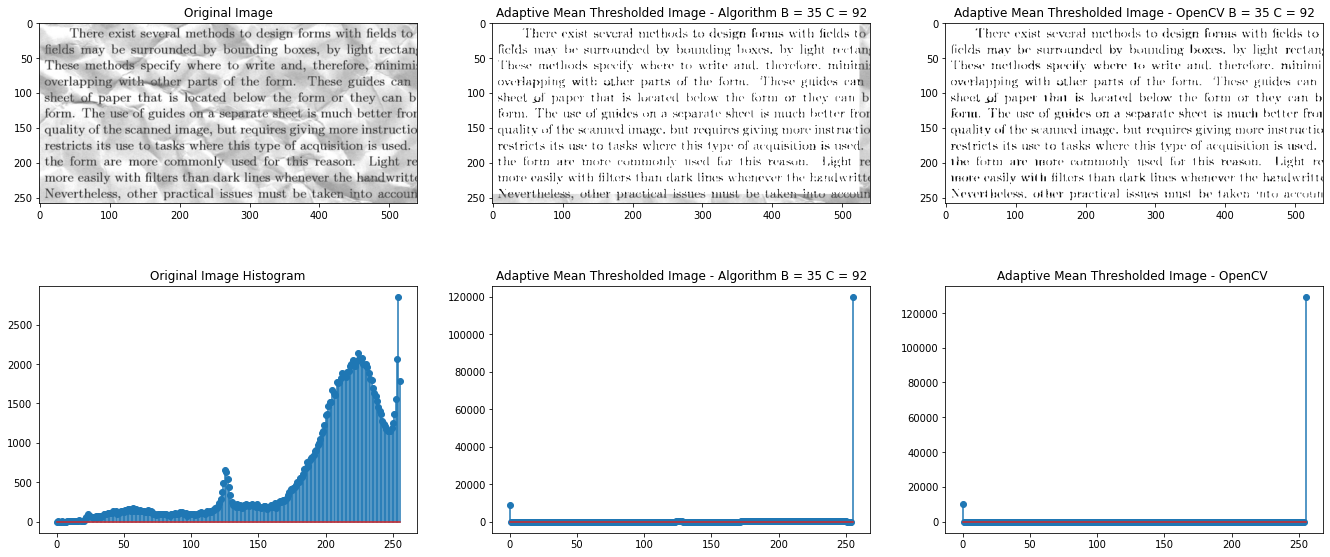

In [ ]:
#Subplot

fig = plt.figure(figsize = (23, 10))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(adapimage, cmap = 'gray')
plt.title('Adaptive Mean Thresholded Image - Algorithm B = 35 C = 92')
plt.subplot(2,3,3)
plt.imshow(adapmean, cmap = 'gray')
plt.title('Adaptive Mean Thresholded Image - OpenCV B = 35 C = 92')

plt.subplot(2,3,4)
histogram_printer(img)
plt.title('Original Image Histogram')
plt.subplot(2,3,5)
'''
Note here that pixels that appear between the 0 to 255
range are because we do not consider the border pixels in our algorithm.
The inbuilt output will not display this error.
'''
histogram_printer(adapimage)
plt.title('Adaptive Mean Thresholded Image - Algorithm B = 35 C = 92')
plt.subplot(2,3,6)
histogram_printer(adapmean)
plt.title('Adaptive Mean Thresholded Image - OpenCV ')

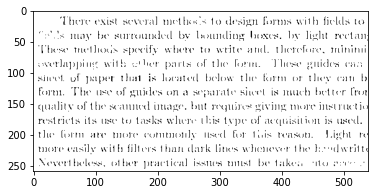

In [ ]:
#Display the result of Gaussian Adaptive
plt.imshow(adapgauss, cmap = 'gray')

3. Adaptive Thresholding: We scan through the whole image with a matrix element of a given block size B and a shifting constant C. We overlap the matrix element with our image. We perform thresholding on each block and give output as the thresholded image. One must note that in some cases subjective to the input picture the Adaptive thresholding is only useful to differentiate the object from the image but not retain its original form.

##OTSU METHOD - INBUILT


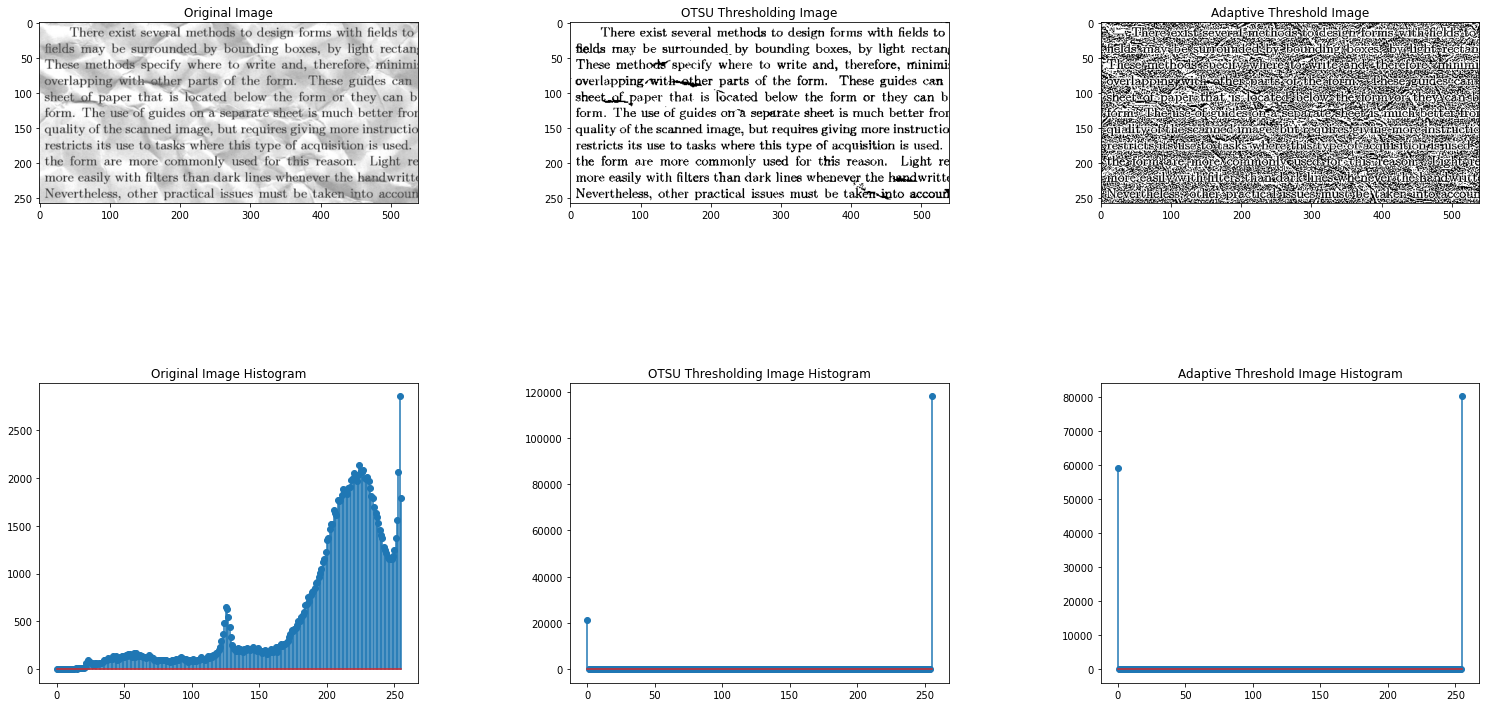

In [ ]:
#Otsu using inbuilt

import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local

# image = data.page()

otsu_thresh = threshold_otsu(img) # Finding the optimal threshold using otsu
binary_otsu = np.where(img > otsu_thresh, 255,0)

block_size = 5
adaptive_thresh = threshold_local(img, block_size, offset=0) # Finding the optimal threshold using adaptive
binary_adaptive = np.where(img > adaptive_thresh, 255,0)

fig = plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(binary_otsu, cmap = 'gray')
plt.title('OTSU Thresholding Image')
plt.subplot(2,3,3)
plt.imshow(binary_adaptive, cmap = 'gray')
plt.title('Adaptive Threshold Image')
plt.subplot(2,3,4)
histogram_printer(img)
plt.title('Original Image Histogram')
plt.subplot(2,3,5)
histogram_printer(binary_otsu)
plt.title('OTSU Thresholding Image Histogram')
plt.subplot(2,3,6)
histogram_printer(binary_adaptive)
plt.title('Adaptive Threshold Image Histogram')

plt.subplots_adjust(left=4,
                    bottom=1, 
                    right=5, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)

In [ ]:
print("Thresholds:")
print("OTSU Threshold:", otsu_thresh)
print("Adaptive Threshold:", adaptive_thresh)

Thresholds:
OTSU Threshold: 161
Adaptive Threshold: [[236.61315391 233.535982   231.27525742 ... 165.42748984 173.47014481
  182.04806073]
 [234.09842334 233.69031626 232.2223232  ... 156.11251018 163.24475503
  173.0885216 ]
 [238.11629129 238.97982073 237.68432075 ... 161.45484665 160.28438729
  163.43047671]
 ...
 [208.92198483 209.60776658 211.34662381 ... 192.80228676 192.95976589
  196.53425074]
 [212.03534277 214.69827142 218.38931772 ... 194.76708594 199.9535864
  208.18592909]
 [217.79762338 220.26122452 222.67964992 ... 195.05414157 205.00445405
  216.54920365]]


##OTSU - ALGORITHM

In [ ]:
#Otsu's Method
'''

def otsu1(img1):
   r, c = img1.shape
   #print(r)
   #print(c)
   least_variance = -1
   least_variance_threshold = -1
   flattenimg = img1.flatten()
   nbins = 0.1

   total = (r * c)
   #print(total)
   thres_vals = np.arange(np.min(img1) + nbins , np.max(img1) - nbins, nbins)  #Range of threshold values
   #print(thres_vals)
   variance = []
   threshold = []

   for value in thres_vals:
     bgimage = flattenimg[flattenimg < value]
     #bgweight = len(bgimage) / weight
     #bgvariance = np.var(bgimage)

     fgimage = flattenimg[flattenimg >= value]
     #fgweight = len(fgimage) / weight
     #fgvariance = np.var(fgimage)
  
     bglen = len(bgimage)
     fglen = len(fgimage)

     bgweight = bglen/total
     fgweight = fglen/total

     bgmean = sum(bgimage)/bglen
     fgmean = sum(fgimage)/fglen

     bgvar = 0
     fgvar = 0

     for i in range(0, bglen):
       bgvar = bgvar + ((bgimage[i] - bgmean)**2 / bglen)
      
     for j in range(0, fglen):
       fgvar = fgvar + ((fgimage[j] - fgmean)**2 / fglen)

     varianceoft = (bgweight * bgvar) + (fgweight * fgvar)
     if least_variance == -1 or least_variance > varianceoft:
            least_variance = varianceoft
            least_variance_threshold = value
     #print("trace:",varianceoft, value)

   return least_variance_threshold

'''

Otsu Threshold is:  161.00000000000014


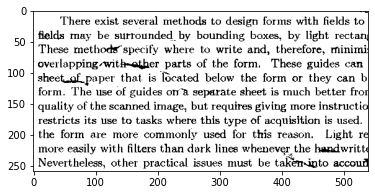

In [ ]:
thresh = otsu(img)
print('Otsu Threshold is: ', thresh)

image = np.where(img > thresh, 255, 0) 
plt.imshow(image, cmap = 'gray')

Text(0.5, 1.0, 'OTSU Thresholded Image - OpenCV')

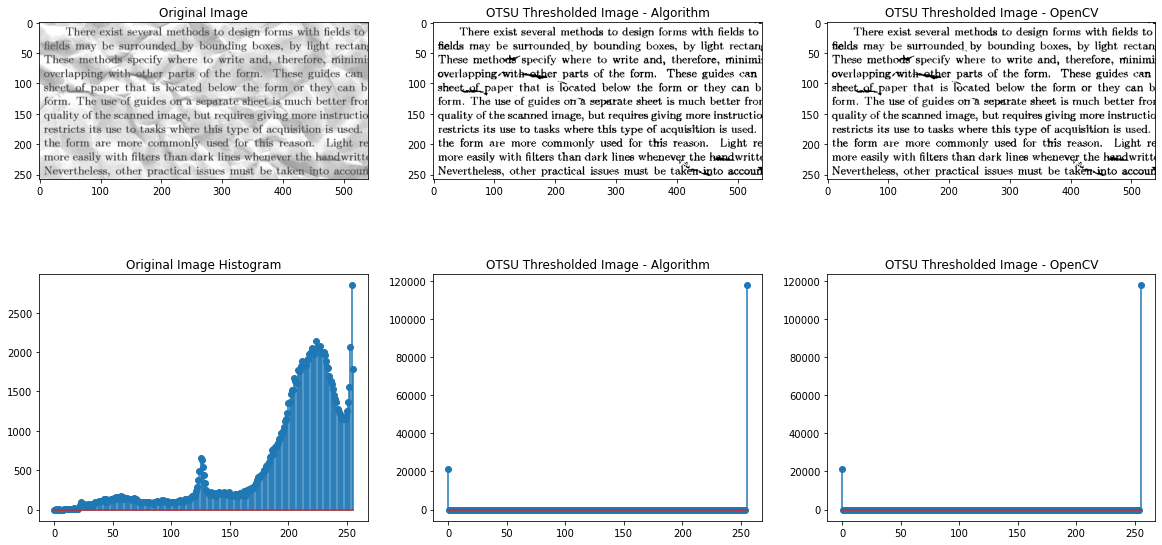

In [ ]:
#Subplot

fig = plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(image, cmap = 'gray')
plt.title('OTSU Thresholded Image - Algorithm')
plt.subplot(2,3,3)
plt.imshow(binary_otsu, cmap = 'gray')
plt.title('OTSU Thresholded Image - OpenCV')

plt.subplot(2,3,4)
histogram_printer(img)
plt.title('Original Image Histogram')
plt.subplot(2,3,5)
histogram_printer(image)
plt.title('OTSU Thresholded Image - Algorithm')
plt.subplot(2,3,6)
histogram_printer(binary_otsu)
plt.title('OTSU Thresholded Image - OpenCV')

4. OTSU Thresholding: This algorithm is a smart way to calculate the Optimal threshold of our image.We divide the image in foreground and background parts at different threshold values and aim at finding the least within class variance at a threshold value t. This value of threshold is our optimal threshold, and will be used to segment the image.

##Text Recognition

PIL stands for Python Imaging Library, it adds image processing capabilities to your program. The module supports many image formats and another module, PyTesseract, which helps us to recognize the text and read it. 

In [ ]:
#Text Recognition on Original Image

image_path_in_colab=('text_with_background.png')   #Original Image
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

 

There exist seyeral methods to design forms with fields to
fields may be surrounded by bounding boxes, by light rectan
Thesesmethods specify where to write and, therefore, minimi
overlappingywith~ether parts of the form. These guides can
sheetusof paper that is Tocated below the form or they\can b
form. The use"of guides ona separate’sheet.is much better fror
quality of the scanned image, but requires giving more instructio
restricts its use to tasks where this type of acquisition is used.
the form are more commonly used for this reason. Light re
more easily with filters than dark lines whenever the handwritt
Nevertheless, other practical issues must be taken into accout

 



In [ ]:
#Text Recognition on Adaptive Mean Algorithm Output 

filename1 = 'adapimage.jpg'
cv2.imwrite(filename1, adapmean)  #Saving the Output Image as JPG file

textimage1=('adapimage.jpg')
extractedInformation1 = pytesseract.image_to_string(Image.open(textimage1))
print(extractedInformation1)

‘Thore exist several methods to design forms with fields to

 

fields may be surrounded by bowing boxes. by light rectan:

 

 

Uhese methods specily where to write and. therefore. minimi

 

overlapping with other parts of the form. ‘Those guides can
sheet of paper that is located below the form or they can b
fort, The use of guides on a separate sheet is much better fran
quality of the scanned image. but requires giving more instructic
restricts its use to tasks where this type of acquisition is used.
the forts are qwore commonly used for This reason. Light re
inore easily wilh fillers than dark lines whenever the hand weit t

Nevertheless, other practical issnes mmst be taken tito accoun



In [ ]:
#Text Recognition on OTSU Binarization Output

filename2 = 'OTSUoutput.jpg'
cv2.imwrite(filename2, image)    #Saving the Output Image as JPG file

textimage2 = ('OTSUoutput.jpg')
extractedInformation2 = pytesseract.image_to_string(Image.open(textimage2))
print(extractedInformation2)

 

‘There exist several methods to design forms with fields to
fields may be surrounded. by bounding boxes, by light rectan
These methods’ specify where to write and, therefore, minimi
overlapping-with-e§her parts of the form. These guides can
sheet.afpaper that is Técated below the form or they can b
form. The use of guides ona separate sheet is much better fror
quality of the scanned image, but requires giving more instructio
restricts its use to tasks where this type of acquisition is used.
the form are more commonly used for this reason. Light re
more easily with filters than dark lines whenever the handwritt
Nevertheless, other practical issues must be takém into accout

 



# Conclusion:
We performed text recognition on the original image, and the other outputs. Observing the text recognition output on the original image, we see that not all the words have been recognized correctly. This is because of the noise and illumination in the image. So we first clean/ enhance the image using different thresholding methods and then apply text recognition on the same.

We observe that the OTSU output image gives us the best output and satisfies all the given parameters compared to the other methods.
On applying text recognition to our OTSU output image, we get better recognition results as the image is now free of noise and has proper illumination as well. 
Implementing text recognition on Adaptive Mean Thresholding does not give us the appropriate results. The results for that will be subjective according to the block size and constant. For better block size and constant values we may get better results for text recognition.
